In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [2]:
np.random.seed(3)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [3]:
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [4]:
# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 10000)
val_rand_idxs = np.random.choice(10000, 5000)

X_train = X_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

In [6]:
train_rand_idxs

array([ 5994,  1688, 11513, ..., 14212, 34068, 44307])

In [7]:
# 라벨링 전환
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [8]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(10000, 784) (10000, 10)
(5000, 784) (5000, 10)
(10000, 784) (10000, 10)


In [9]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [10]:
# 3. 모델의 오차함수, 최적화 함수 설정
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [11]:
from keras.callbacks import EarlyStopping

In [12]:
# early_stopping = EarlyStopping() # 조기종료 콜백함수 정의
early_stopping = EarlyStopping(patience = 30) # 조기종료 콜백함수 정의
hist = model.fit(X_train, y_train, 
                 epochs=3000, 
                 batch_size=10, 
                 validation_data=(X_val, y_val), 
                 callbacks=[early_stopping])

Epoch 1/3000
1000/1000 [==============================] - 1s 840us/step - loss: 1.0283 - accuracy: 0.7127 - val_loss: 0.4250 - val_accuracy: 0.8788
Epoch 2/3000
1000/1000 [==============================] - 1s 684us/step - loss: 0.4011 - accuracy: 0.8866 - val_loss: 0.3307 - val_accuracy: 0.8996
Epoch 3/3000
1000/1000 [==============================] - 1s 680us/step - loss: 0.3192 - accuracy: 0.9088 - val_loss: 0.2932 - val_accuracy: 0.9136
Epoch 4/3000
1000/1000 [==============================] - 1s 673us/step - loss: 0.2751 - accuracy: 0.9207 - val_loss: 0.2666 - val_accuracy: 0.9228
Epoch 5/3000
1000/1000 [==============================] - 1s 675us/step - loss: 0.2428 - accuracy: 0.9315 - val_loss: 0.2497 - val_accuracy: 0.9254
Epoch 6/3000
1000/1000 [==============================] - 1s 668us/step - loss: 0.2162 - accuracy: 0.9381 - val_loss: 0.2381 - val_accuracy: 0.9274
Epoch 7/3000
1000/1000 [==============================] - 1s 662us/step - loss: 0.1942 - accuracy: 0.9439 - val_

In [13]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
type(hist)

keras.callbacks.History

In [15]:
hist.history['loss']

[1.0283260345458984,
 0.4010566473007202,
 0.31918489933013916,
 0.2750616669654846,
 0.24282929301261902,
 0.21617183089256287,
 0.19422875344753265,
 0.17604665458202362,
 0.15779872238636017,
 0.14347843825817108,
 0.12908801436424255,
 0.11877638846635818,
 0.10844872891902924,
 0.09918571263551712,
 0.0890507847070694,
 0.08190573006868362,
 0.07465825974941254,
 0.06792937964200974,
 0.060986537486314774,
 0.05572563037276268,
 0.050651393830776215,
 0.046912867575883865,
 0.04302540794014931,
 0.03896167129278183,
 0.03500571474432945,
 0.03171843662858009,
 0.02854996919631958,
 0.0261138454079628,
 0.023493077605962753,
 0.021437566727399826,
 0.019218318164348602,
 0.017750181257724762,
 0.016366902738809586,
 0.0148591548204422,
 0.013602116145193577,
 0.012513372115790844,
 0.011657054536044598,
 0.010852601379156113,
 0.010130763053894043,
 0.009401670657098293,
 0.00888136401772499,
 0.008426341228187084,
 0.00795331783592701,
 0.007480725180357695,
 0.00693901302292943,


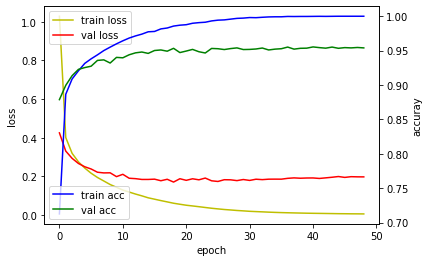

In [16]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [17]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

313/313 [==============================] - 0s 778us/step - loss: 0.1925 - accuracy: 0.9546

loss : 0.1925330013036728
accuray : 0.9545999765396118
